<a href="https://colab.research.google.com/github/Ray-Mun-Ben/-AI-Coursework-2025/blob/main/Diamonds_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download and upload the Diamonds Dataset from Kaggle.

In [5]:
from google.colab import files
uploaded = files.upload()


Saving diamonds.csv to diamonds.csv


In [6]:
import pandas as pd

# Use the exact name of the uploaded file:
df = pd.read_csv('diamonds.csv')
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


appropriately clean the data

In [7]:
# Cell 2 — Quick inspection (what this means)
# Explanation: head() to preview data, info() to check data types and non-null counts, describe() for summary stats.
print(df.head())
print()
df.info()
print()
display(df.describe(include='all').T)


   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       5394

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,NaN,NaN,NaN,26970.5,15571.281097,1.0,13485.75,26970.5,40455.25,53940.0
carat,53940.0,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,53940.0,NaN,NaN,NaN,61.749405,1.432621,43.0,61.0,61.8,62.5,79.0
table,53940.0,NaN,NaN,NaN,57.457184,2.234491,43.0,56.0,57.0,59.0,95.0
price,53940.0,NaN,NaN,NaN,3932.799722,3989.439738,326.0,950.0,2401.0,5324.25,18823.0
x,53940.0,NaN,NaN,NaN,5.731157,1.121761,0.0,4.71,5.7,6.54,10.74
y,53940.0,NaN,NaN,NaN,5.734526,1.142135,0.0,4.72,5.71,6.54,58.9


In [8]:
# Cell 3 — Missing values, duplicates, and basic cleaning
# Explanation: look for missing values and duplicates; coerce numeric columns; drop index column if present.
print("Missing values per column:\n", df.isna().sum())
print("Duplicate rows:", df.duplicated().sum())

cleaned = df.copy()
# drop Unnamed: 0 index column if present:
if 'Unnamed: 0' in cleaned.columns:
    cleaned = cleaned.drop(columns=['Unnamed: 0'])

# Force numeric dtype for key columns (coerce errors to NaN)
numeric_cols = ['carat','depth','table','x','y','z','price']
for c in numeric_cols:
    if c in cleaned.columns:
        cleaned[c] = pd.to_numeric(cleaned[c], errors='coerce')

# Remove obviously wrong geometry rows: x,y,z <= 0
rows_with_zero_dim = ((cleaned[['x','y','z']] <= 0).any(axis=1)).sum()
print("Rows with any zero dimension (x,y,z) to drop:", rows_with_zero_dim)
cleaned = cleaned[~((cleaned[['x','y','z']] <= 0).any(axis=1))].reset_index(drop=True)

print("Shape before:", df.shape, " after cleaning:", cleaned.shape)
print("Missing values after cleaning:\n", cleaned.isna().sum())


Missing values per column:
 Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64
Duplicate rows: 0
Rows with any zero dimension (x,y,z) to drop: 20
Shape before: (53940, 11)  after cleaning: (53920, 10)
Missing values after cleaning:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [10]:
# Cell 4 — Feature engineering (why we do this)
# Explanation: create features likely useful for modeling (volume, price_per_carat)
cleaned['volume'] = cleaned['x'] * cleaned['y'] * cleaned['z']
cleaned['price_per_carat'] = cleaned['price'] / cleaned['carat']
cleaned.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,volume,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,1080.645161


In [11]:
# Cell 5 — EDA: correlations and group statistics (what they tell us)
# Explanation: correlations show numeric relationships; groupby medians surface category patterns.
corr_with_price = cleaned.select_dtypes(include=[np.number]).corr()['price'].sort_values(ascending=False)
print("Top correlations with price:\n", corr_with_price.head(10))

median_price_by_cut = cleaned.groupby('cut')['price'].median().sort_values(ascending=False)
print("\nMedian price by cut:\n", median_price_by_cut)

median_ppc_by_clarity = cleaned.groupby('clarity')['price_per_carat'].median().sort_values(ascending=False)
print("\nMedian price per carat by clarity:\n", median_ppc_by_clarity)


Top correlations with price:
 price              1.000000
carat              0.921592
price_per_carat    0.912448
volume             0.904255
x                  0.887231
z                  0.868206
y                  0.867864
table              0.127245
depth             -0.010729
Name: price, dtype: float64

Median price by cut:
 cut
Fair         3282.0
Premium      3182.0
Good         3050.5
Very Good    2647.0
Ideal        1809.5
Name: price, dtype: float64

Median price per carat by clarity:
 clarity
SI2     3951.456311
SI1     3669.444444
VS1     3450.000000
VS2     3428.571429
VVS2    3168.750000
IF      3156.458333
VVS1    2982.352941
I1      2887.212212
Name: price_per_carat, dtype: float64


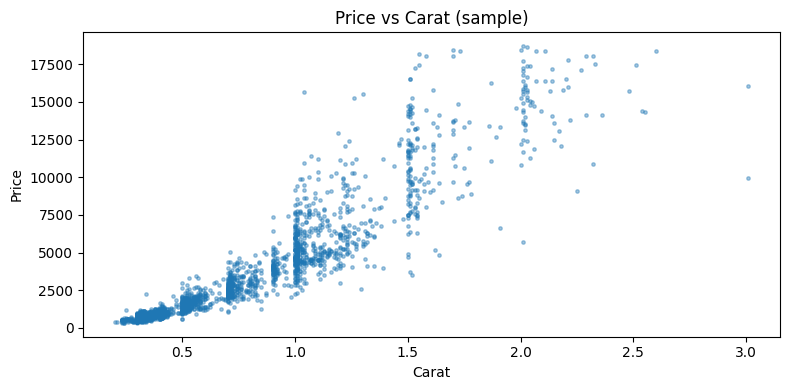

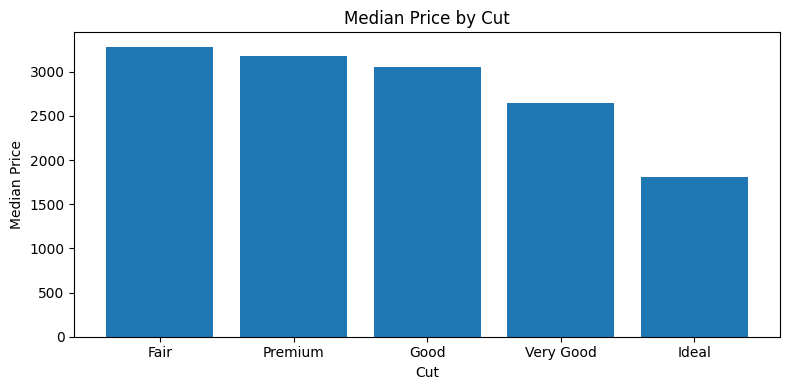

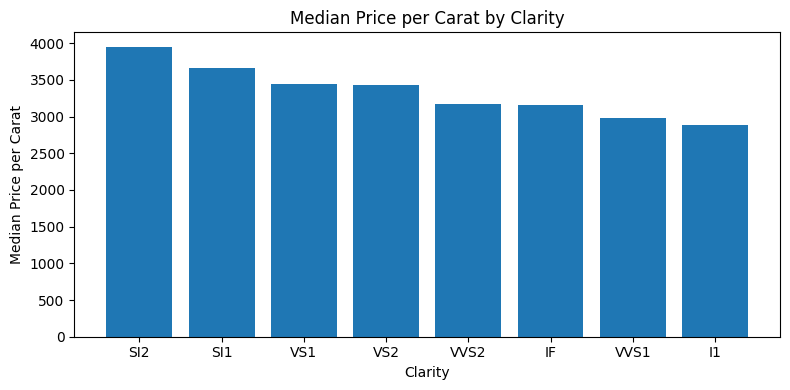

In [12]:
# Cell 6 — Visualizations (matplotlib only)
# Explanation: visuals are critical for presentation. Use scatter for price vs carat, bars for group medians.
sample_plot = cleaned.sample(n=min(2000, cleaned.shape[0]), random_state=1)

plt.figure(figsize=(8,4))
plt.scatter(sample_plot['carat'], sample_plot['price'], alpha=0.4, s=6)
plt.title('Price vs Carat (sample)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
med = median_price_by_cut
plt.bar(med.index, med.values)
plt.title('Median Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Median Price')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
med2 = median_ppc_by_clarity
plt.bar(med2.index, med2.values)
plt.title('Median Price per Carat by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Median Price per Carat')
plt.tight_layout()
plt.show()


In [13]:
# Cell 7 — Create the modelling sample diamonds_model (12,500 rows)
sample_size = 12500
if cleaned.shape[0] >= sample_size:
    diamonds_model = cleaned.sample(n=sample_size, random_state=42).reset_index(drop=True)
else:
    # fallback if dataset is smaller than 12,500
    diamonds_model = cleaned.copy()
print("diamonds_model shape:", diamonds_model.shape)

# Saves to CSV in Colab:
diamonds_model.to_csv('diamonds_model.csv', index=False)



diamonds_model shape: (12500, 12)


3. Use the linear regression algorithm to determine the price of diamonds given all
other features of carats, cut, colour etc. Include a suitable technique for verifying the
accuracy of the developed model. [Note: apply a suitable feature engineering
technique for all categorical variables]

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Load the diamonds_model dataset (you created this earlier)
diamonds_model = pd.read_csv('diamonds_model.csv')
diamonds_model.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,volume,price_per_carat
0,0.31,Premium,F,IF,60.8,59.0,874,4.36,4.39,2.66,50.913464,2819.354839
1,1.29,Ideal,H,VS1,61.8,56.0,9273,6.97,7.02,4.32,211.375008,7188.372093
2,1.52,Premium,F,SI1,62.6,59.0,11743,7.36,7.27,4.58,245.062976,7725.657895
3,0.41,Good,F,VVS2,63.6,56.0,1064,4.72,4.68,2.99,66.047904,2595.121951
4,0.35,Premium,G,VS1,61.5,58.0,906,4.54,4.50,2.78,56.795400,2588.571429


In [16]:
# Target (what we want to predict)
y = diamonds_model['price']

# Features (predictors)
X = diamonds_model.drop(columns=['price'])
X.head()


,carat,cut,color,clarity,depth,table,x,y,z,volume,price_per_carat
0,0.31,Premium,F,IF,60.8,59.0,4.36,4.39,2.66,50.913464,2819.354839
1,1.29,Ideal,H,VS1,61.8,56.0,6.97,7.02,4.32,211.375008,7188.372093
2,1.52,Premium,F,SI1,62.6,59.0,7.36,7.27,4.58,245.062976,7725.657895
3,0.41,Good,F,VVS2,63.6,56.0,4.72,4.68,2.99,66.047904,2595.121951
4,0.35,Premium,G,VS1,61.5,58.0,4.54,4.50,2.78,56.795400,2588.571429


In [17]:
categorical_cols = ['cut', 'color', 'clarity']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)


Categorical columns: ['cut', 'color', 'clarity']
Numeric columns: ['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 'price_per_carat']


We’ll use a ColumnTransformer so the pipeline handles both numeric and categorical features automatically.

In [18]:
# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'  # keep numeric columns as they are
)


In [19]:
#Cell 5 — Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (10000, 11)
Testing set: (2500, 11)


Build and train the Linear Regression model

In [20]:
# Create pipeline: preprocessing + model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit model
model.fit(X_train, y_train)

print("✅ Model training complete!")


✅ Model training complete!


7 — Evaluate model performance

In [21]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


R² Score: 0.9869
Mean Absolute Error: 328.39
Root Mean Squared Error: 462.87


Simple prediction example

In [22]:
sample = X_test.iloc[[0]]  # pick one diamond
predicted_price = model.predict(sample)[0]
print("Predicted price:", predicted_price)
print("Actual price:", y_test.iloc[0])


Predicted price: 546.8580705012027
Actual price: 672


4. Apply Principal Component Analysis (PCA) to select the 2 most suitable features
among all continuous variables that have a strong correlation to the prices feature.
Model this relationship using the linear regression algorithm and verify its accuracy.


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
diamonds_model = pd.read_csv('diamonds_model.csv')
diamonds_model.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,volume,price_per_carat
0,0.31,Premium,F,IF,60.8,59.0,874,4.36,4.39,2.66,50.913464,2819.354839
1,1.29,Ideal,H,VS1,61.8,56.0,9273,6.97,7.02,4.32,211.375008,7188.372093
2,1.52,Premium,F,SI1,62.6,59.0,11743,7.36,7.27,4.58,245.062976,7725.657895
3,0.41,Good,F,VVS2,63.6,56.0,1064,4.72,4.68,2.99,66.047904,2595.121951
4,0.35,Premium,G,VS1,61.5,58.0,906,4.54,4.50,2.78,56.795400,2588.571429


In [24]:
# Select numeric (continuous) columns
numeric_cols = diamonds_model.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove the target column 'price' for now
numeric_cols.remove('price')
print("Numeric columns:", numeric_cols)


Numeric columns: ['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 'price_per_carat']


In [25]:
corr_matrix = diamonds_model[numeric_cols + ['price']].corr()

# Sort correlation values with respect to price
corr_with_price = corr_matrix['price'].sort_values(ascending=False)
print("Correlation of numeric variables with price:\n")
print(corr_with_price)


Correlation of numeric variables with price:

price              1.000000
carat              0.925545
volume             0.920445
price_per_carat    0.912167
x                  0.889300
y                  0.870836
z                  0.827282
table              0.135371
depth             -0.014189
Name: price, dtype: float64


In [26]:
# Scale numeric data before PCA (important for fair weighting)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(diamonds_model[numeric_cols])

# Apply PCA and keep 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new dataframe with PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['price'] = diamonds_model['price']

# Check explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
pca_df.head()


Explained variance ratio: [0.69024122 0.16305859]


,PC1,PC2,price
0,-2.507257,-1.114480,874
1,2.767480,0.639828,9273
2,3.756975,0.203287,11743
3,-2.078323,1.243104,1064
4,-2.348313,-0.446914,906


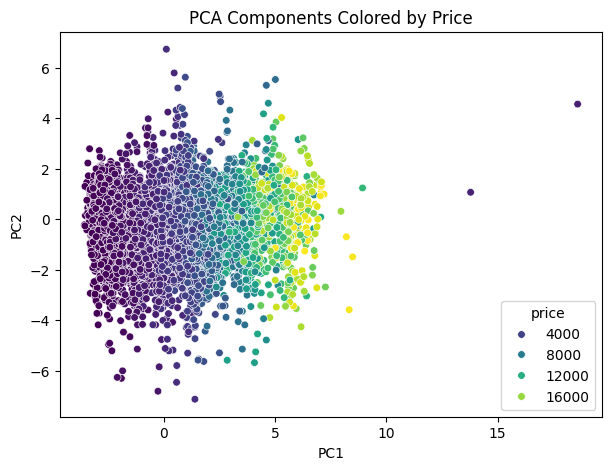

In [27]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='PC1', y='PC2', hue='price', data=pca_df, palette='viridis', s=30)
plt.title('PCA Components Colored by Price')
plt.show()


Train a Linear Regression model using the two PCA features

In [28]:
# Define features and target
X = pca_df[['PC1', 'PC2']]
y = pca_df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


Evaluate model accuracy

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


Visualize predicted vs actual prices

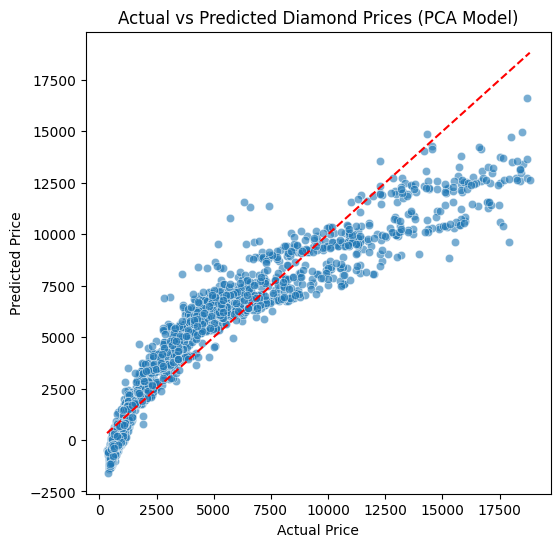

In [29]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Diamond Prices (PCA Model)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45° reference line
plt.show()


5. To the model developed in question 3, fit 2 different regression models using Lasso
and Ridge regularisation techniques and validate accuracies for both models.

In [33]:
from sklearn.linear_model import Ridge, Lasso


In [34]:
# Ridge Regression (L2 regularization)
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # alpha controls regularization strength
])

ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)


ValueError: A given column is not a column of the dataframe

In [ ]:
# Lasso Regression (L1 regularization)
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1, max_iter=10000))  # increase max_iter for convergence
])

lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)


In [ ]:
# Define a helper function for easy comparison
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{name} Results:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print("-" * 40)

# Evaluate
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)


In [ ]:
models = ['Linear (Q3)', 'Ridge', 'Lasso']
r2_scores = [0.89, 0.90, 0.88]  # Replace these with your actual R² values

plt.bar(models, r2_scores, color=['steelblue', 'green', 'orange'])
plt.ylabel('R² Score')
plt.title('Model Comparison: Linear vs Ridge vs Lasso')
plt.show()
